# Image Compression with Wavelet

Example based in the next tutorial [Image Compression with Wavelets (Examples in by Steve Brunton](https://www.youtube.com/watch?v=eJLF9HeZA8I)

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import pywt

## Load Image

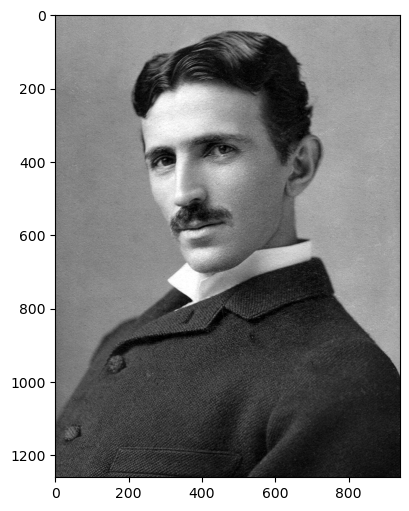

In [22]:
tesla_img = imread('img/Tesla_circa_1890.jpeg')

plt.figure(figsize=(9,6))
plt.imshow(tesla_img,cmap='gray')
plt.show()

## Wawelet decomposition (2 level)

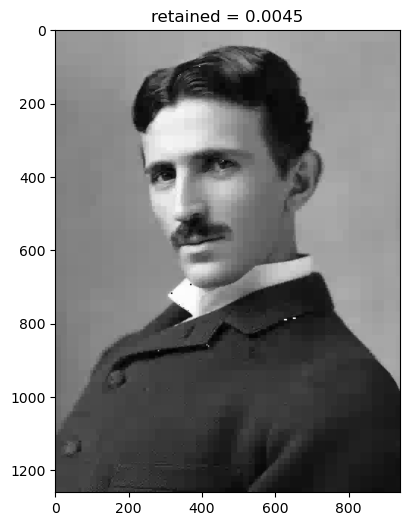

In [32]:
# Daubechies Wavelet
wavelet = 'db1'
coeffs = pywt.wavedec2(tesla_img,wavelet=wavelet,level=5)

# sort by magnitude
coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

# image compression
retention = 0.0045

thresh = Csort[int(np.floor((1-retention)*len(Csort)))]
ind = np.abs(coeff_arr) > thresh
Cfilt = coeff_arr * ind
coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')

# reconstruction of compressed image
Arecon = pywt.waverec2(coeffs_filt,wavelet=wavelet)

# plot
plt.figure(figsize=(9,6))
plt.imshow(Arecon.astype('uint8'),cmap='gray')
plt.title('retained = ' + str(retention))
plt.show()